In [1]:
import pickle
import argparse
parser = argparse.ArgumentParser()
from trainer import Trainer 
from const import * 
import pandas as pd



manifold =  LORENTZ 
model = HS4 
dataset =  PHEME  
max_sent_len = 20 
max_com_len = 20 
max_sents = 30 
max_coms = 30 
lr =  0.001 
fourier = False 
curv = 1.0 
enable_log =  False 
embedding_dim = 200 


file = open(f'{DATA_PATH}/{dataset}/{dataset}_preprocessed.pkl', 'rb')
df = pd.read_csv(f'{DATA_PATH}/{dataset}/{dataset}.csv') 
props = pickle.load(file)

id_train, id_test = props['train']['id'], props['val']['id']
raw_c_train, raw_c_val = list(df[df['id'].isin(id_train)]['comments']), list(df[df['id'].isin(id_test)]['comments'])
raw_c_train = [c.split('::') if isinstance(c, str) else '' for c in raw_c_train]
raw_c_val= [c.split('::') if isinstance(c, str) else '' for c in raw_c_val]
x_train, x_val = props['train']['x'], props['val']['x']
y_train, y_val = props['train']['y'], props['val']['y']
c_train, c_val = props['train']['c'], props['val']['c']
sub_train, sub_val = props['train']['subgraphs'], props['val']['subgraphs']


trainer = Trainer(
    manifold=manifold,
    model_type=model,
    platform=dataset, 
    max_sen_len=max_sent_len, 
    max_com_len=max_com_len, 
    max_sents=max_sents, 
    max_coms=max_coms, 
    lr = lr, 
    fourier = fourier,
    curv=curv,
    enable_log=enable_log,
    embedding_dim=int(embedding_dim)
)


/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/dgl/backend/pytorch/sparse.py:104: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=th.float16)
/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/dgl/backend/pytorch/sparse.py:128: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, dZ):
/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/dgl/backend/pytorch/sparse.py:177: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=th.float16)
/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/dgl/backend/pytorch/sparse.py:207: FutureWarning: `torch.cuda.amp.custom_bwd(args...)

init k 1.0
using manifold  lorentz
using fourier False


In [2]:
# trainer.run(
#     train_x=x_train, 
#     train_y=y_train, 
#     train_c=c_train, 
#     train_raw_c=raw_c_train, 
#     val_x=x_val, 
#     val_y=y_val, 
#     val_c=c_val, 
#     val_raw_c=raw_c_val, 
#     sub_train=sub_train, 
#     sub_val=sub_val, 
#     batch_size=32, 
#     epochs=100,
#     eval=True
# )


saved tokenizer
Building model....
building HypPostEnc
building HypComEnc
building CoAttention
lorentz 1.0
hs4 built
Encoding texts....
preparing dataset....
Dataset prepared.
Model loaded successfully.


/home/jupyter-iec_chau/chau/Hyphen/trainer.py:771: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(model_path))


fitting document-level reducer
fitting sent-level reducer


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


fitting word-level reducer
init k 1
init k 1
init k 1


/home/jupyter-iec_chau/miniconda3/envs/venv/lib/python3.10/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


init k 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


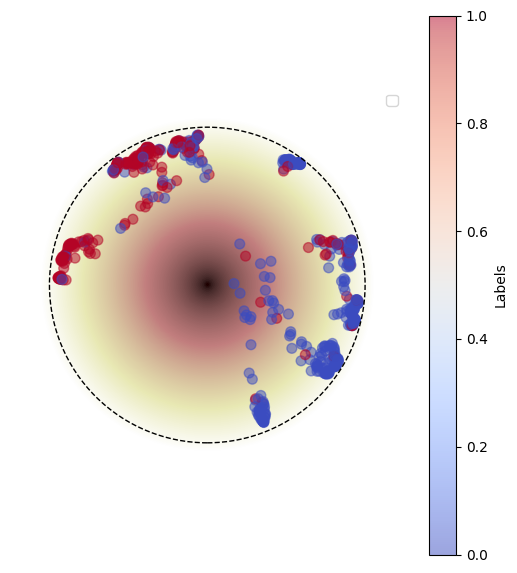

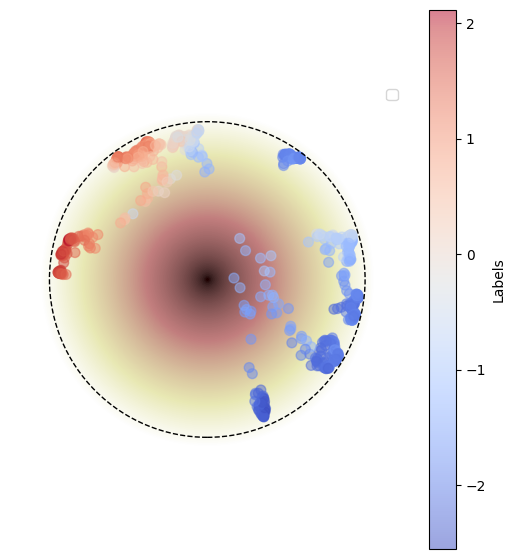

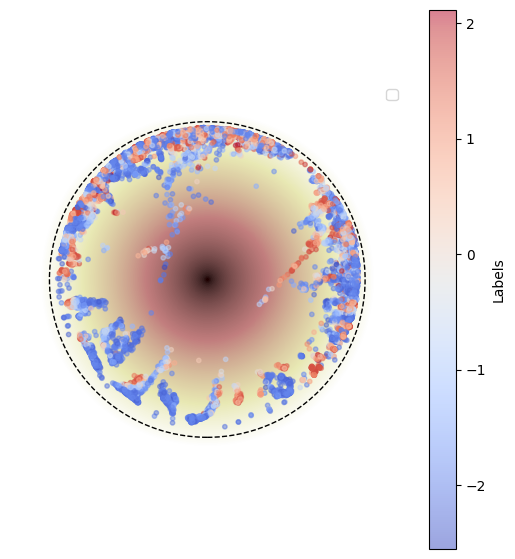

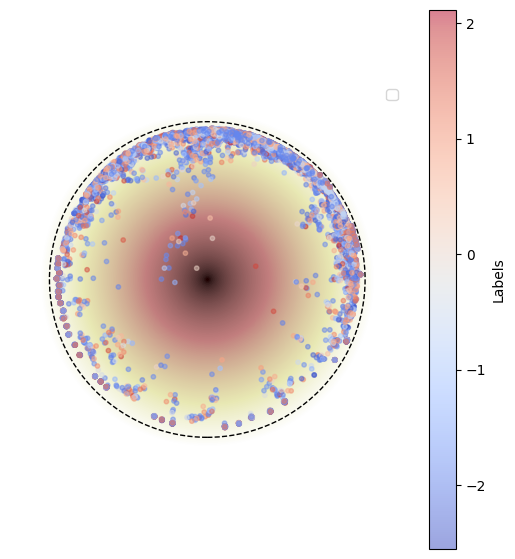

In [3]:
# fig_co, fig_co_s, fig_co_c, fig_sent_s, fig_sent_c = trainer.run(
fig_co = trainer.run(
    train_x=x_train, 
    train_y=y_train, 
    train_c=c_train, 
    train_raw_c=raw_c_train, 
    val_x=x_val, 
    val_y=y_val, 
    val_c=c_val, 
    val_raw_c=raw_c_val, 
    sub_train=sub_train, 
    sub_val=sub_val, 
    batch_size=32, 
    epochs=100,
    eval=False,
    visualize=True
)
